<a href="https://colab.research.google.com/github/Gautamadarshi/Book-Recommendation-System/blob/Adarshi/Book_Recommendendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jay Maa Sarswati**

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the Datasets

In [ ]:
book_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Books.csv"
users_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Users.csv"
ratings_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Ratings.csv"

books = pd.read_csv(book_url)
users = pd.read_csv(users_url)
ratings = pd.read_csv(ratings_url)

<ipython-input-73-172146175586>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(book_url)


Viewing My DataSet

In [ ]:
#DataSet first view
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [ ]:
books.shape

(271360, 8)

In [ ]:
users.shape

(278858, 3)

In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
books.describe

<bound method NDFrame.describe of               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford         

In [ ]:
users.describe

<bound method NDFrame.describe of         User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]>

In [ ]:
ratings.describe

<bound method NDFrame.describe of          User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]>

In [ ]:
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [ ]:
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [ ]:
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


**Check Dublicate Values**

In [ ]:
# DataSet Dublicate Value Count
books.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

0

# Misssing Value/Null Vlues

In [ ]:
def missing_values(dataframe):
  '''The function will calculate the missing values and present it in a tabular form '''
  # Calculate the number of missing values in each column
  missing_values_count = dataframe.isnull().sum()

  # Calculate the percentage of missing values in each column
  missing_values_percentage = round(dataframe.isnull().mean().mul(100), 2)

  # Create a table containing the number and percentage of missing values
  missing_values_table = pd.concat([missing_values_count, missing_values_percentage], axis=1)
  missing_values_table = missing_values_table.rename(columns={0: 'Count of Missing Values', 1: '[% of Total Value]'})
  
  # Sort the table by the percentage of missing values in descending order
  missing_values_table = missing_values_table.sort_values('[% of Total Value]', ascending=False)

  # Reset the index of the table
  missing_values_table = missing_values_table.reset_index().rename(columns={'index': 'Column Name'})

  return missing_values_table

In [ ]:
# Missing values/null values count
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,ISBN,0,0.0
1,Book-Title,0,0.0
2,Book-Author,1,0.0
3,Year-Of-Publication,0,0.0
4,Publisher,2,0.0
5,Image-URL-S,0,0.0
6,Image-URL-M,0,0.0
7,Image-URL-L,3,0.0


In [ ]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,Age,110762,39.72
1,User-ID,0,0.00
2,Location,0,0.00


In [ ]:
missing_values(ratings)

,Column Name,Count of Missing Values,[% of Total Value]
0,User-ID,0,0.0
1,ISBN,0,0.0
2,Book-Rating,0,0.0


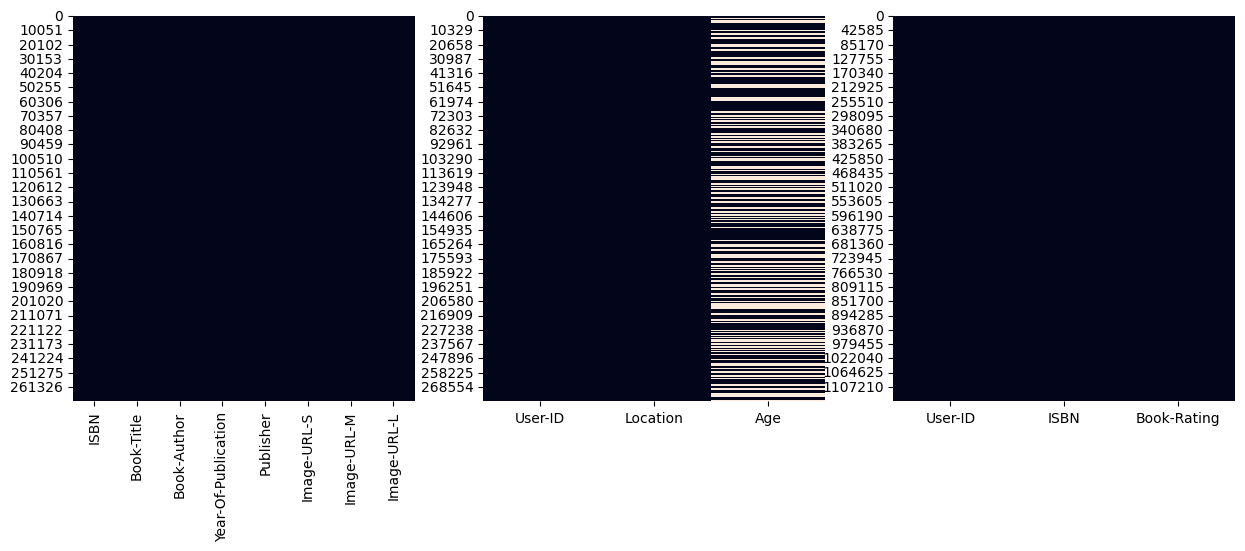

In [ ]:
# visulazing the missing values
fig,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
sns.heatmap(books.isnull(),cbar=False, ax=ax1)
sns.heatmap(users.isnull(),cbar=False, ax=ax2)
sns.heatmap(ratings.isnull(),cbar=False, ax=ax3)
plt.show()




*   **The books csv contains number of rows are 271360 and numbers of columns are 8.**

*   **The users csv contains number of rows are 278858 and number of columns are 3.**


*   **The ratings csv contains number of rows are 1149780 and number of columns are 3.**

*   **There are almost 40% missing values in age columns of the users csv.**





#**Understanding Your Variables**

In [ ]:
# DataSet columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
# DataSet Describe
books.describe(include= 'all').round(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
users.describe(include='all').round(3)

,User-ID,Location,Age
count,278858.000,278858,168096.000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.500,NaN,34.751
std,80499.515,NaN,14.428
min,1.000,NaN,0.000
25%,69715.250,NaN,24.000
50%,139429.500,NaN,32.000
75%,209143.750,NaN,44.000


In [ ]:
ratings.describe(include='all').round(2)


,User-ID,ISBN,Book-Rating
count,1149780.00,1149780,1149780.00
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,140386.40,NaN,2.87
std,80562.28,NaN,3.85
min,2.00,NaN,0.00
25%,70345.00,NaN,0.00
50%,141010.00,NaN,0.00
75%,211028.00,NaN,7.00


#**Variables Description**

The book crossing dataset comprises of 3 files.

**Books:**





*   ISBN: International standard book number(invalid ISBNs have been removed from the dataset.)

*   Book_Title: Author of the book


*   Year-of-publication: Year

*   Publisher: Publisher

*   Image-URL-S: url for small image

*   Image-URL-M: url for medium image


*   Image-URL-L: url for large image
 
Urls point to Amazon Website.  
 **Users:**


*   User-ID: Anonymized user id(integers)

*   Location: Location if unavailable,Null

*   Age: Age of the user if unavailable,Null

**Ratings:**


*   User-ID: Anonymized user id (integers)

*   ISBN: International standard book number


*   Book-Rating: Explicit = rating on a scale of 1-10(higher value denoting higher appreciation) or implicit expressed by 0.


















# Check Unique Values for each variable.

In [ ]:
# check unique values for each variable.
def unique_values(data):
  for i in data.columns.tolist():
    print("No. of unique values in",i,"is",data[i].nunique())
  return None

In [ ]:
unique_values(books)

No. of unique values in ISBN is 271360
No. of unique values in Book-Title is 242135
No. of unique values in Book-Author is 102023
No. of unique values in Year-Of-Publication is 202
No. of unique values in Publisher is 16807
No. of unique values in Image-URL-S is 271044
No. of unique values in Image-URL-M is 271044
No. of unique values in Image-URL-L is 271041


In [ ]:
unique_values(users)

No. of unique values in User-ID is 278858
No. of unique values in Location is 57339
No. of unique values in Age is 165


In [ ]:
unique_values(ratings)

No. of unique values in User-ID is 105283
No. of unique values in ISBN is 340556
No. of unique values in Book-Rating is 11


# **Data Wrangling**

Data wrangling Code

In [ ]:
# renaming all the columns for case of uses
books.rename(columns={'ISBN':'isbn',"Book-Title":'book_title',
                      'Book-Author':'book_author',
                      'Year-Of-Publication':'year_of_publication',
                      'Publisher':'publisher','Image-URL-S':'img_s',
                      'Image-URL-M':'img_m','Image-URL-L':'img_l'}
      , inplace=True)

In [ ]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# changing the url from http to https for deployment
def change_url(url):
    if isinstance(url,str):
        url=url.replace('http','https')
    return url

books['img_s']=books['img_s'].apply(change_url)
books['img_m']=books['img_m'].apply(change_url)
books['img_l']=books['img_l'].apply(change_url)

In [ ]:
ratings.rename(columns={'User-ID':'user_id', 'ISBN':'isbn', 
                      'Book-Rating':'book_rating'}
        , inplace=True)

In [ ]:
# rename users column
users.rename(columns={'User-ID':'user_id', 'Location':'location', 
                      'Age':'age'}
        , inplace=True)

In [ ]:
books['year_of_publication'].unique( )

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

**Merging the Dataset**

In [ ]:
location = users.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

users['city'] = location['city']
users['state'] = location['state']
users['country'] = location['country']

In [ ]:
users

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


In [ ]:
users.country.unique()

array(['usa', 'russia', 'portugal', ..., 'la svizzera', 'hernando',
       'united kingdom.'], dtype=object)

In [ ]:
data = pd.merge(users, ratings, on = 'user_id')
data = pd.merge(data, books, on = 'isbn')
data.head()

,user_id,location,age,city,state,country,isbn,book_rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,2,"stockton, california, usa",18.0,stockton,california,usa,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....
1,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
2,11400,"ottawa, ontario, canada",49.0,ottawa,ontario,canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
3,11676,"n/a, n/a, n/a",NaN,n/a,n/a,n/a,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
4,41385,"sudbury, ontario, canada",NaN,sudbury,ontario,canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....


In [ ]:
data.shape

(1031136, 15)

In [ ]:
# Removing the unwanted columns
data_2 = data.drop(['location','img_s','img_m','img_l'], axis = 1)

In [ ]:
data_2.head()

,user_id,age,city,state,country,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,2,18.0,stockton,california,usa,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,NaN,timmins,ontario,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,49.0,ottawa,ontario,canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,NaN,n/a,n/a,n/a,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,NaN,sudbury,ontario,canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


# What all multiplications have you done and insights you found


**Renamed all the columns for the 3 csv, changed the required datatypes for some columns.**

**Created a country,city and state columns from the location columns.**

**Replaced most of the errors in the country columns.**

**Limited the year of publication as per the book crossing dataset**


#**4 Data Visulaziation, Storytelling, & Experimenting with charts: Understanding the relationships between variables**

Chart-1  Age Distribution

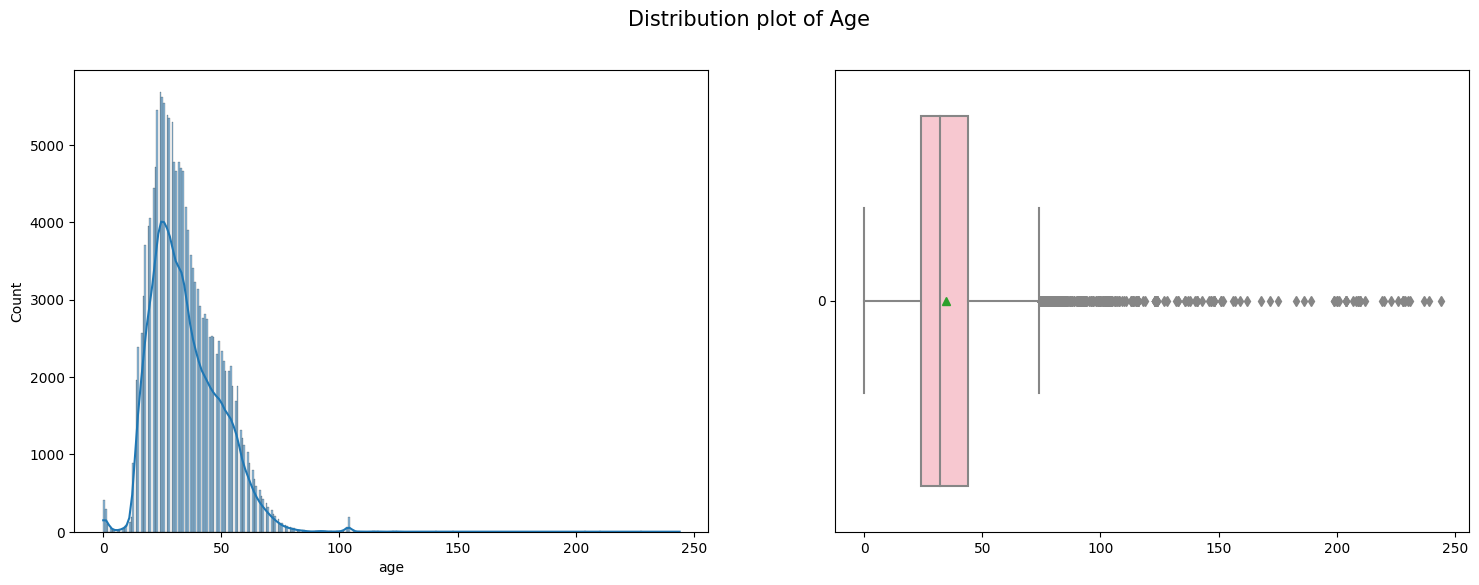

In [ ]:
# Age Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(users['age'], ax = axes[0],kde = True)
sns.boxplot(users['age'], ax = axes[1],orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Age", fontsize = 15)
plt.show()

1. Why did you pick the specific chart?

 A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.
  Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

  A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

  Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

  2. What is/are the insight(s) found from the chart?

  **From the distribution it appears that the columns is positively skewed(right skewed).**

  **The boxplot shows that there are a lot of outliers present.**

  3. Will the gained insights help creating a positive business impact?

   Are there any insights that lead to negative growth? Justify with specific reason.

   

The insights gained from the histogram and boxplot could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. Understanding the distribution of age and the presence of outliers could help in creating more accurate and personalized book recommendations for users. However, additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.



# Chart-2. Book Rating Distribution.

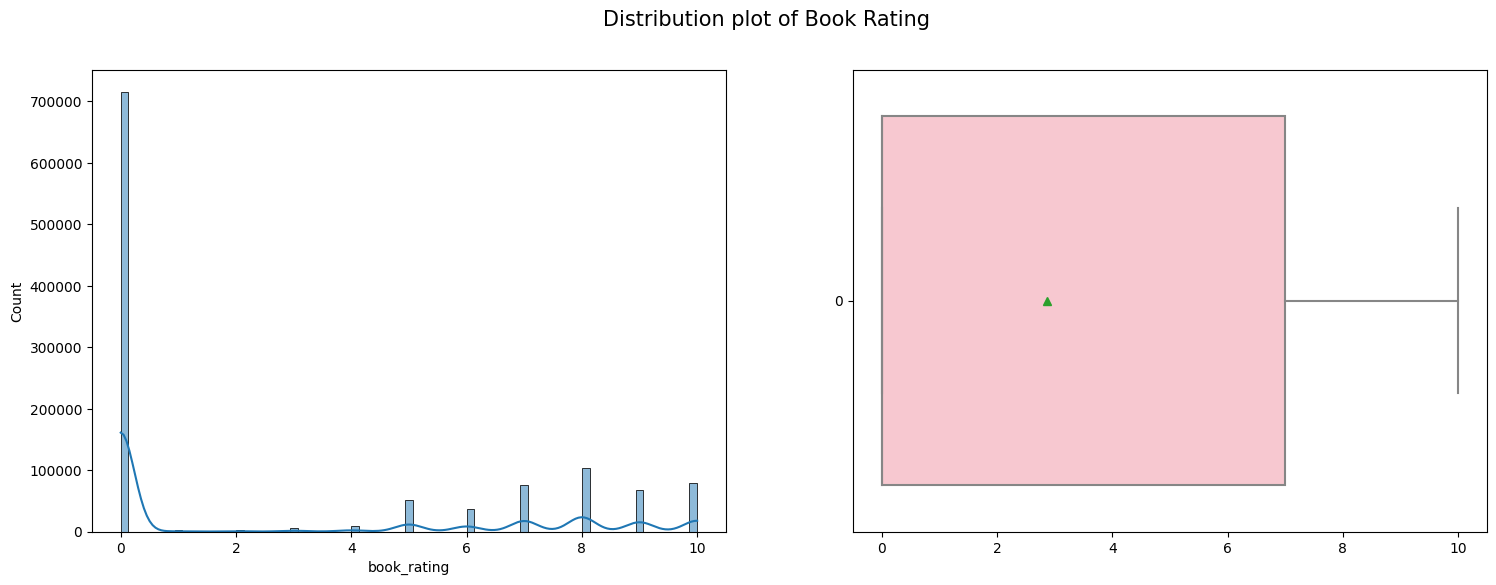

In [ ]:
# Rating Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(ratings['book_rating'], ax = axes[0],kde = True)
sns.boxplot(ratings['book_rating'], ax = axes[1], orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Book Rating", fontsize = 15)
plt.show()

1. Why you choose this specific chart? 



A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


2. What is/are insight(s) found from the chart?

**We see that there are a lot of zeros (implicit ratings) thats the reason the boxplot is flushed to the left side.**

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

These insights alone may not be sufficient to create a positive business impact and additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.


#Chart-3. Explicit Ratings

In [ ]:
explicit = ratings[ratings['book_rating']!=0]

In [ ]:
plt.show()

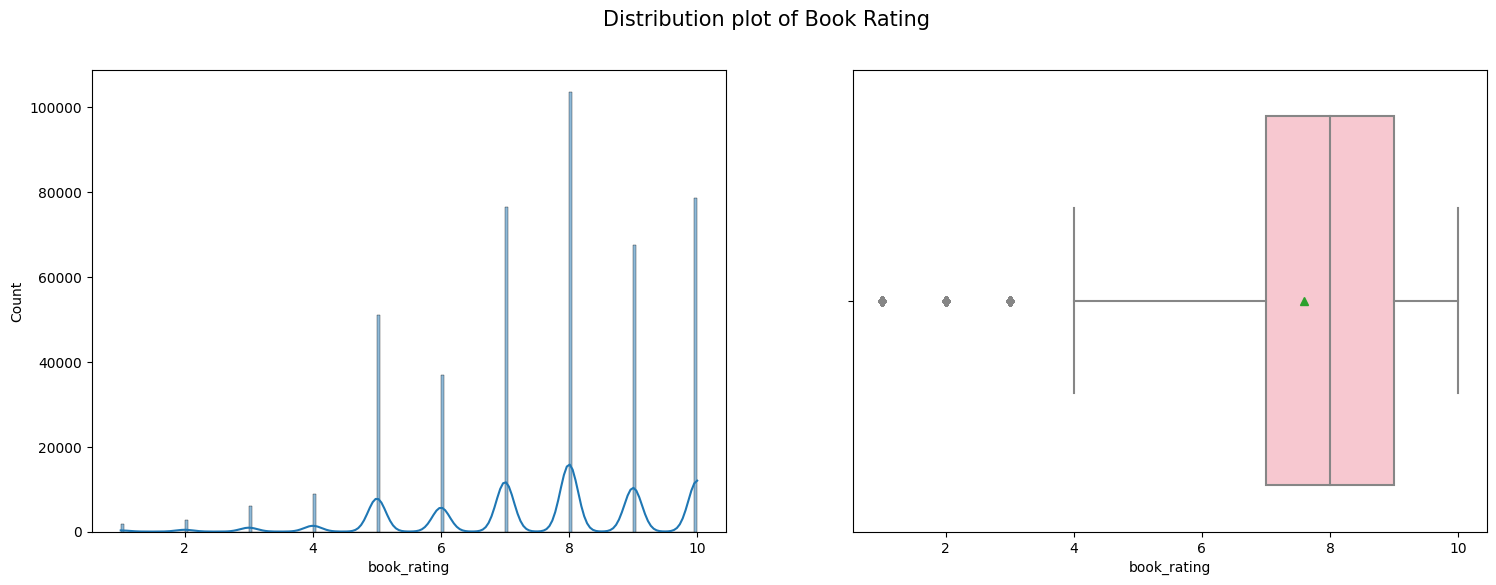

In [ ]:
# Explicit Rating Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(explicit['book_rating'], ax = axes[0],kde = True)
sns.boxplot(x=explicit['book_rating'], ax = axes[1], orient='h', showmeans=True, color='pink')
fig.suptitle("Distribution plot of Book Rating", fontsize = 15)
plt.show()


1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.
2. What is/are the insight(s) found from the chart?

**The explicit ratings are from 1 to 10, the histogram shows that the most count of ratings is 8.**

**The boxplots shows that the median is 8 and mean is somewhere close to 7.5**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

These insights alone may not be sufficient to create a positive business impact and additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.


# Chart-4. Year of Publication

In [ ]:
year = books['year_of_publication'].value_counts().reset_index()
year.columns = ['year', 'count']
year = year.sort_values(by='count', ascending=False).head(15)
year['year']='Year '+year['year'].astype(int).astype(str)

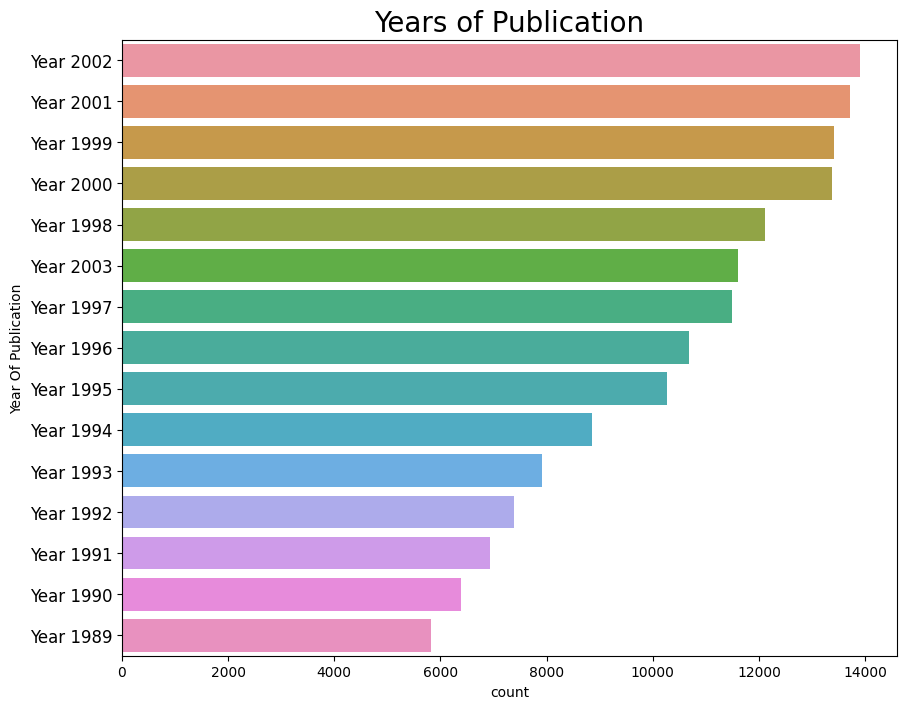

In [ ]:
# Year of publication
plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=year, orient = 'h')
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()


1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The bar chart shows that the most number of books were published in the year 2002 followed by 1999 and 2001.**

**It appears that there are twice as many books published in 2002 than in 1989.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, such as the number of books published in different years, could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. This information could be used to improve the recommendation system by taking into account the publication year when making recommendations.


 Function for bar plot

In [128]:
def bar_plot(df,col,label):
    plot_df = df[col].value_counts().head(15).reset_index()
    plot_df.columns=[col,'count']

    plt.figure(figsize=(10,8))
    sns.barplot(x='count',y=col,data=plot_df)
    plt.ylabel(label)
    plt.title(label,size=20)
    plt.show()

Chart-5 .Top Book Title

In [129]:
data_2[data_2['book_title']=='Wild Animus']['book_title'].count()

2502

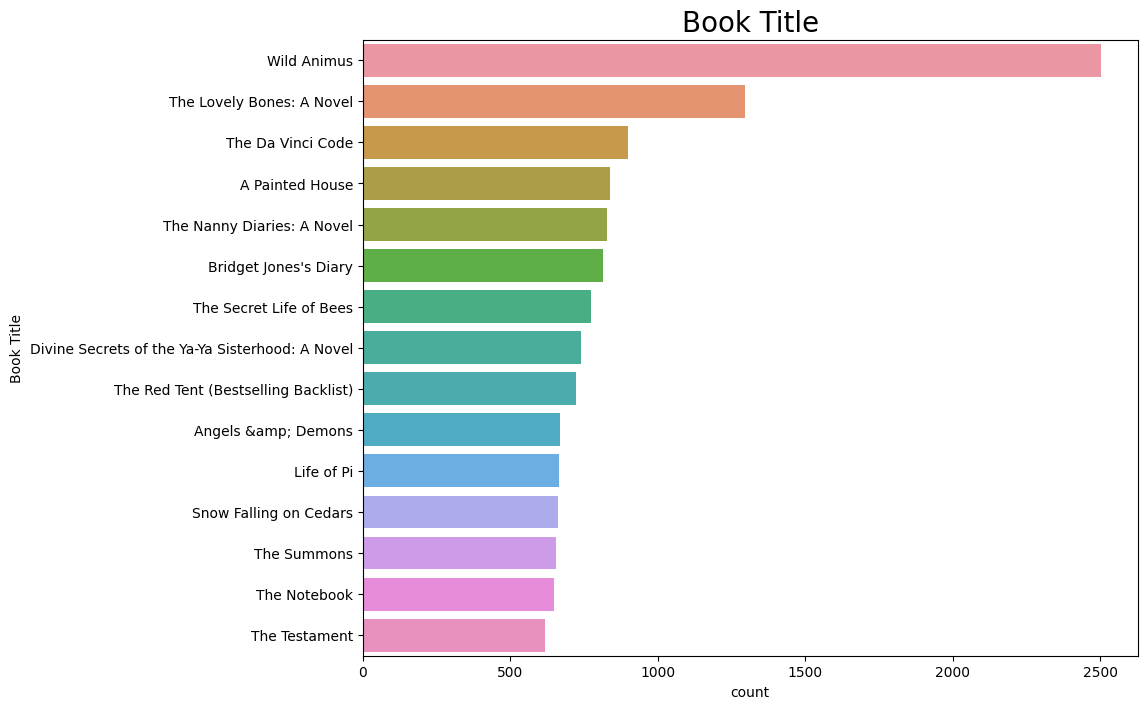

In [130]:
# Top books by number of ratings
bar_plot(data_2, 'book_title', 'Book Title')

1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The most rated book is Wild Animus with 2502 ratings, followed by The Lovely Bones:A Novel and The Da Vinci Code.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, such as the most rated books, could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. This information could be used to improve the recommendation system by taking into account the popularity of books when making recommendations.


Chart-6. The Top Book Author

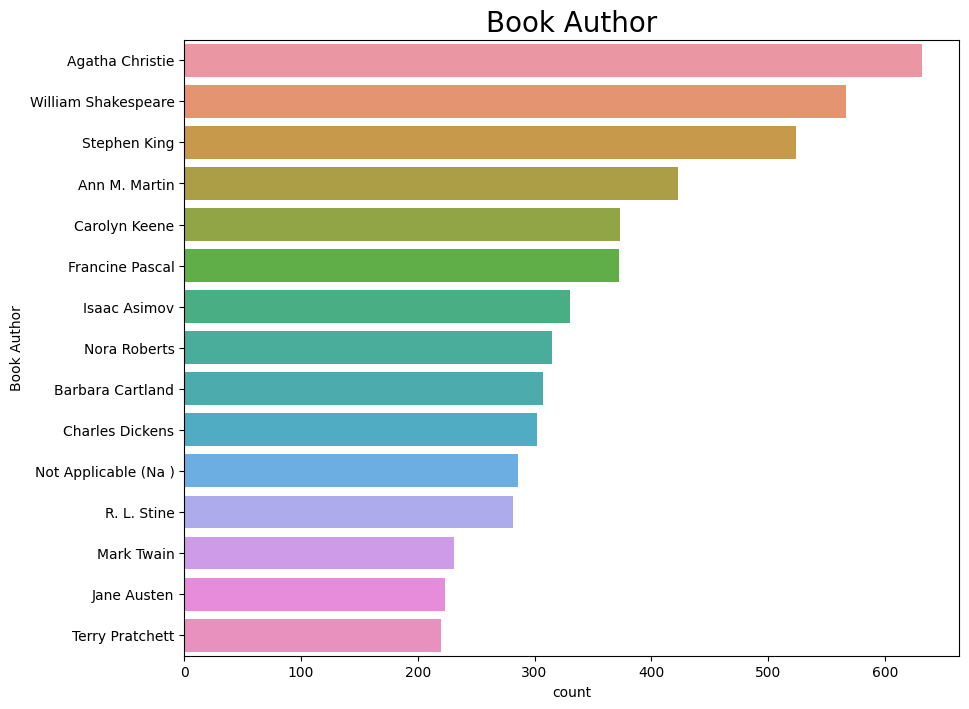

In [131]:
# Plot of book author based on number of books
bar_plot(books, 'book_author', 'Book Author')

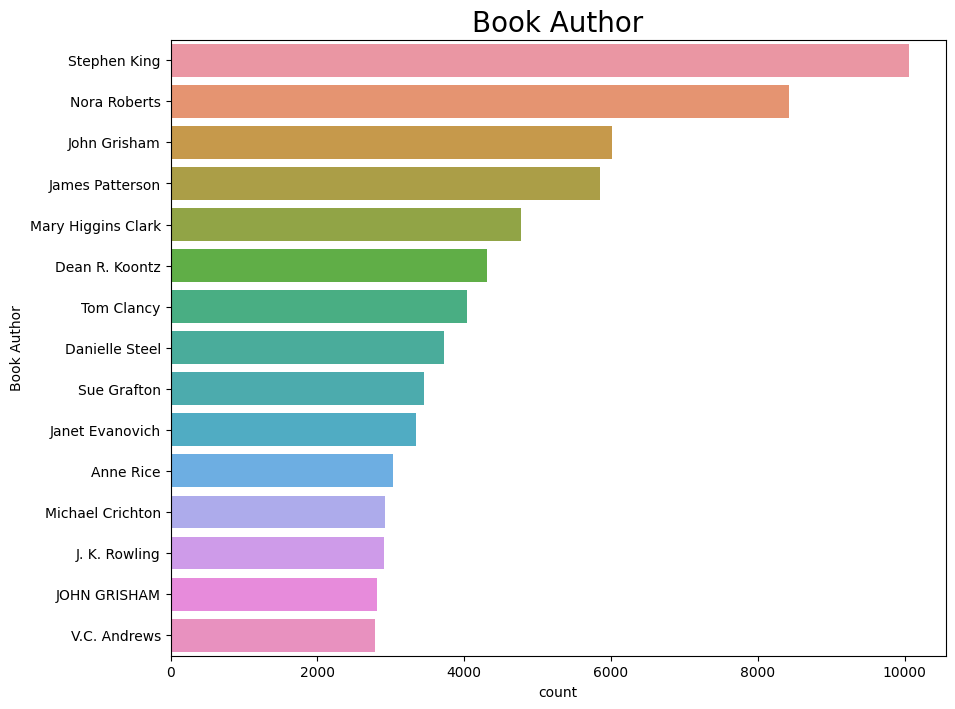

In [132]:
# Plot of book author based on number of reviews
bar_plot(data_2, 'book_author', 'Book Author')

1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The top author is Agatha Christie as per the number of books followed by William Shakespeare and for the most number of ratings is Nora Roberts followed by Stephen King.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the top authors based on the number of books and ratings, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the popularity of authors when making recommendations. For example, books by popular authors such as Agatha Christie and Nora Roberts could be recommended to users who have shown an interest in similar genres or themes.


Chart-7. Book Publisher

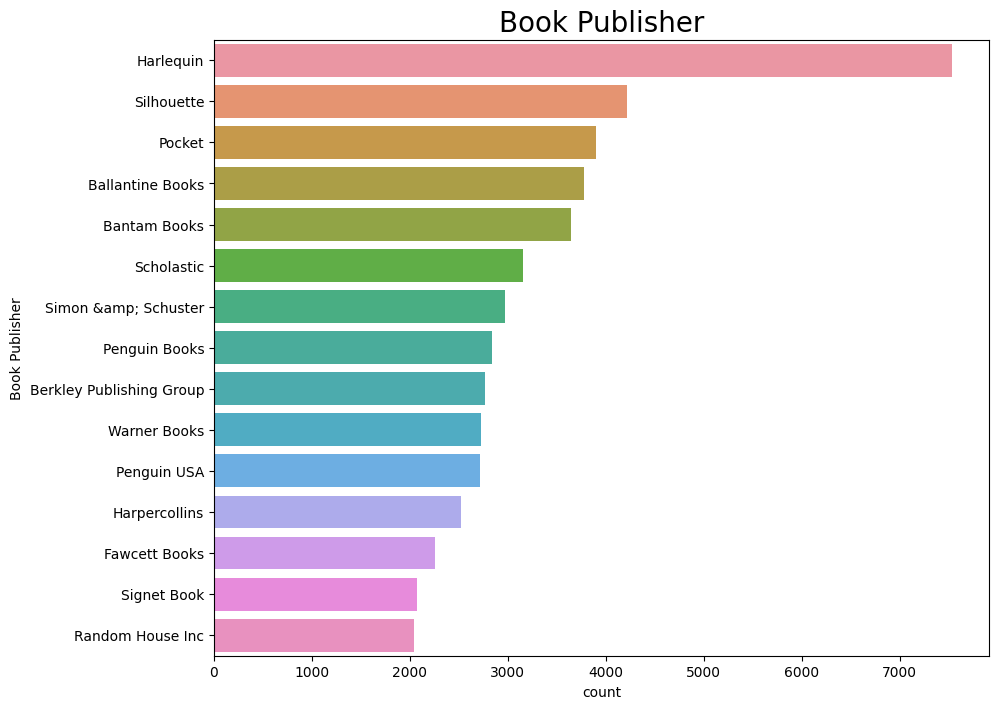

In [133]:
# plot of book publishers based on number of books
bar_plot(books, 'publisher', 'Book Publisher')

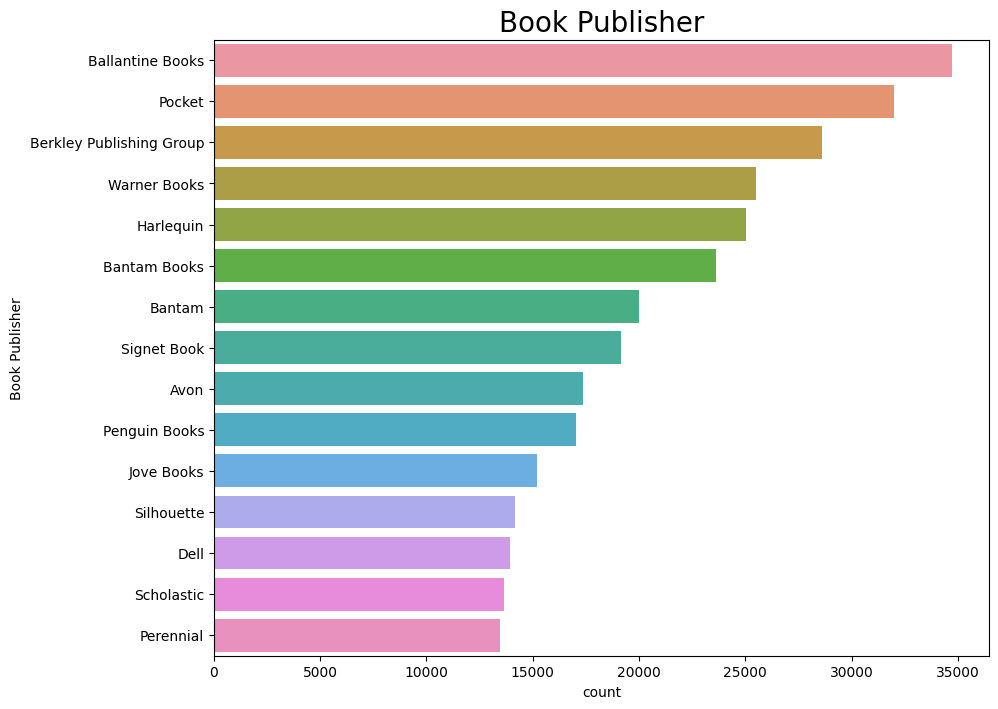

In [135]:
# Plot of book author based on number of reviews
bar_plot(data_2, 'publisher', 'Book Publisher')

1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The most number of books are published by Harleyquin and also the most number of rated books publisher is Harleyquin.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the most popular publisher based on the number of books and ratings, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the popularity of publishers when making recommendations. For example, books published by popular publishers such as Harlequin could be recommended to users who have shown an interest in similar genres or themes.


Chart-8. Top Countries.

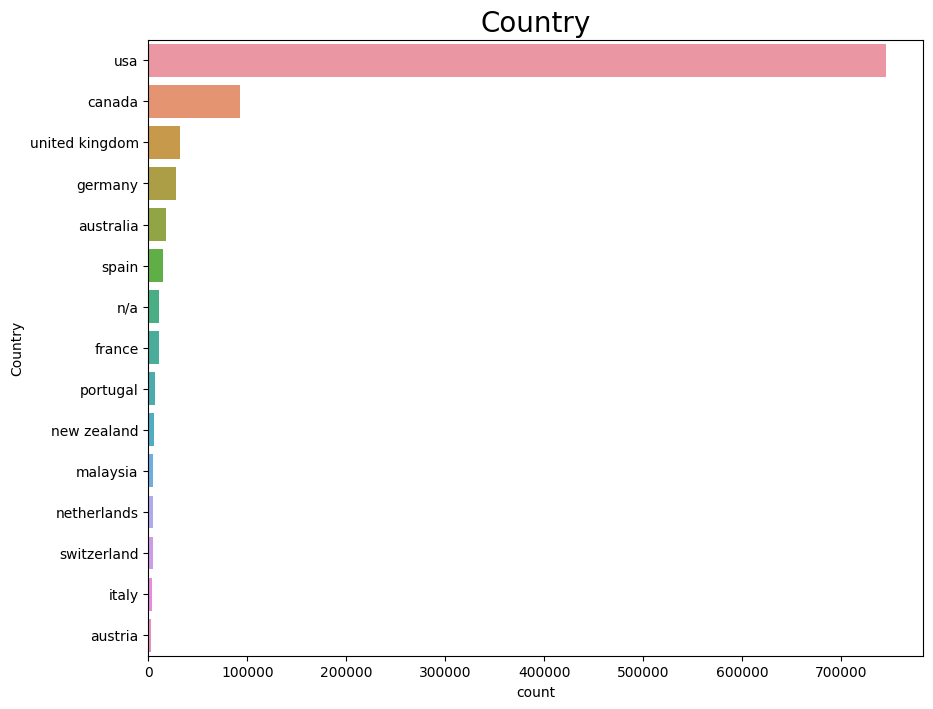

In [136]:
# Top 10 books by number of books
bar_plot(data_2, 'country', 'Country')

1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The most number of users are from USA followed by Canada. The remaining countries have comparatively less users who rate the books.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of users by country, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the location of users when making recommendations. For example, books that are popular or relevant in specific countries such as the USA and Canada could be recommended to users from those countries.


Chart- Correlation Heatmap

<ipython-input-137-0ed0a98d32e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_2.corr()


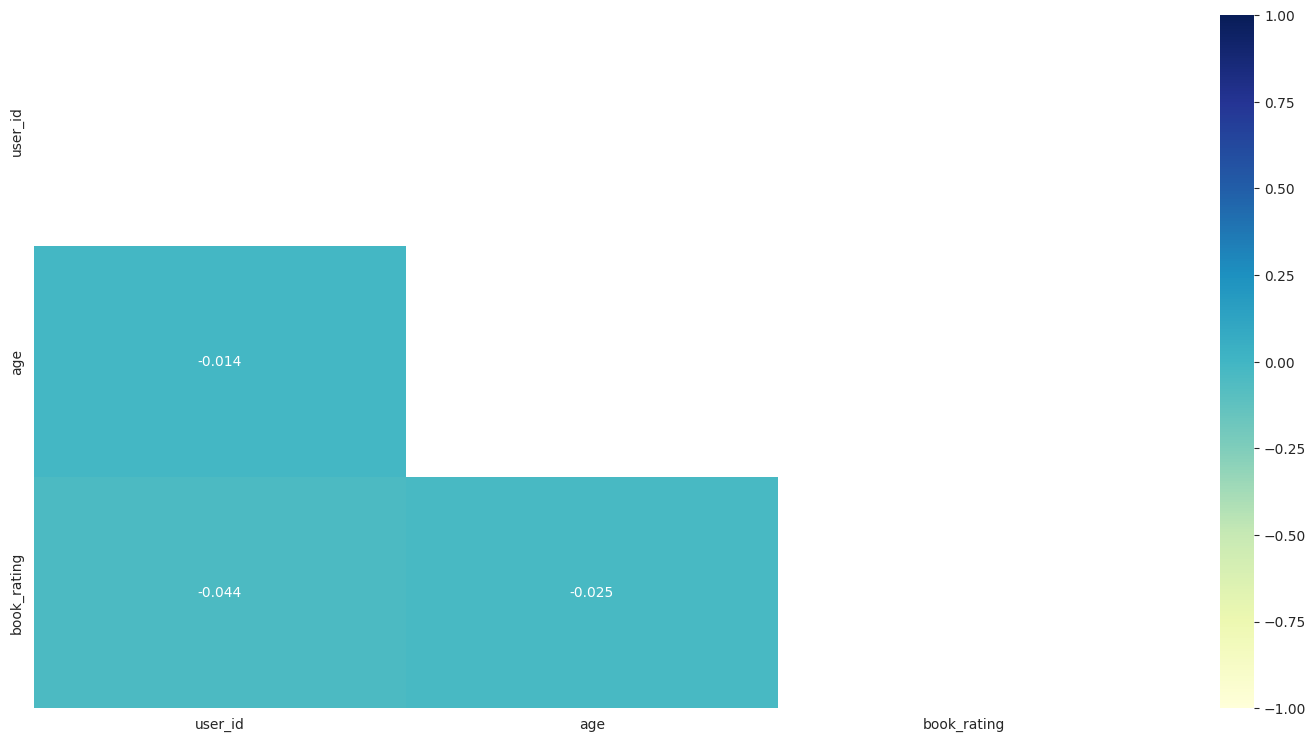

In [137]:
# Correlation Heatmap visualization code
corr = data_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.
2. What is/are the insight(s) found from the chart?

**We see that the columns are not correlated to each other.**


Chart- Pair Plot

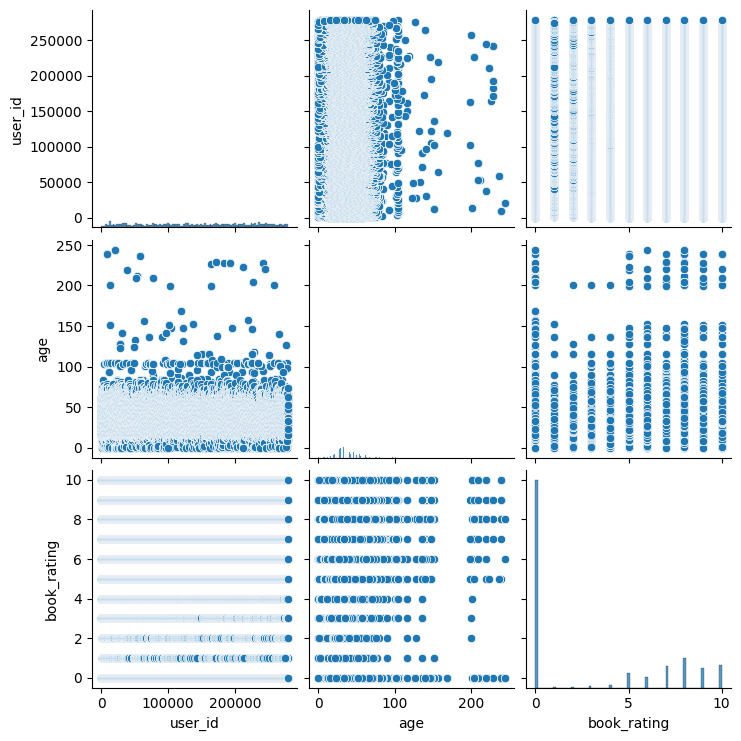

In [138]:
# Pair Plot
sns.pairplot(data_2)
plt.show()

1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.
2. What is/are the insight(s) found from the chart?

**In the pair plot not much insight is gained.**


# **Feature Engineering & Data Processing**

# Handling Missing value and Outliers

Users

In [139]:
missing_values (users)

,Column Name,Count of Missing Values,[% of Total Value]
0,age,110762,39.72
1,country,4577,1.64
2,user_id,0,0.00
3,location,0,0.00
4,city,0,0.00
5,state,1,0.00


In [140]:
# replace outlier with nan
users.loc[(users.age > 100) | (users.age < 5), 'age'] = np.nan

In [141]:
# filling the age as per the median value of country
users['age'] = users['age'].fillna(users.groupby('country')['age'].transform('median'))

In [142]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,country,4577,1.64
1,age,3098,1.11
2,user_id,0,0.00
3,location,0,0.00
4,city,0,0.00
5,state,1,0.00


In [143]:
# replacing the remaining nan values with mean
users['age'].fillna(users.age.mean(),inplace=True)

In [144]:
# replacing unknown countries with other
users.fillna('others', inplace=True)

In [145]:
# dropping location, city, state, columns.
users.drop(['location','city','state'], axis=1, inplace=True)

In [146]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,user_id,0,0.0
1,age,0,0.0
2,country,0,0.0




**Replaced the outlier (ages less than 5 and morethan 99) in the age column with NaN. Replaced the missing age as per the median value of country. Replaced the remaining NaN values with mean age.**

**Replaced the remaining missing values in the users with 'others'**


Books

In [147]:
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,isbn,0,0.0
1,book_title,0,0.0
2,book_author,1,0.0
3,year_of_publication,0,0.0
4,publisher,2,0.0
5,img_s,0,0.0
6,img_m,0,0.0
7,img_l,3,0.0


In [156]:
books["year_of_publication"].fillna(round(books["year_of_publication"].median()), inplace = True)


TypeError: ignored

In [149]:
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,isbn,0,0.0
1,book_title,0,0.0
2,book_author,1,0.0
3,year_of_publication,0,0.0
4,publisher,2,0.0
5,img_s,0,0.0
6,img_m,0,0.0
7,img_l,3,0.0
